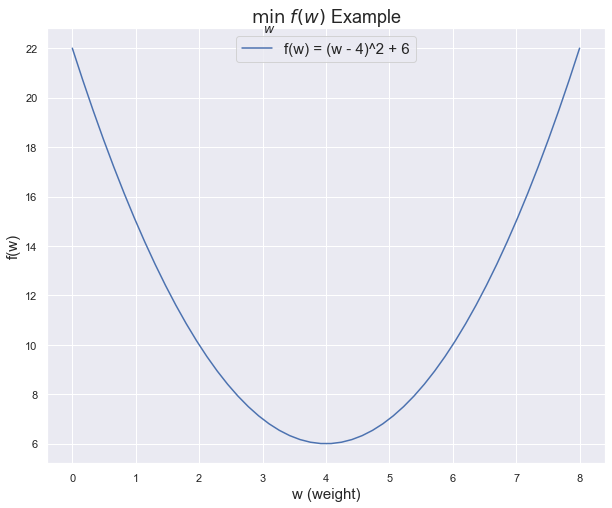

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme()

def f(w):
    return (w - 4)**2  + 6


domain = np.linspace(0, 8, 50)

plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(w) = (w - 4)^2 + 6")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(w)$ Example", fontsize = 18)
plt.show()

---

## 4.1.1 The Problem Description

Clearly the function $f(w) = (w - 4)^2 + 6$ has a **global minimum** at $w = 4$. Supposing we did not already know the answer, how could we find it? That is, we wish to solve:

$$
\min_{w\in \mathbb{R}} f(w) \:\:\:\:\:\:\:\:\:\: (\text{PROBLEM 1})
$$

This class of problems falls into the reahlm of *unconstrained continuous optimization*.

The treatment of PROBLEM 1 given by Nocedal and Wright is extensive and goes much further than what is currently implemented in machine learning; with some notable exceptions appearing in the literature. Noting these techniques, this notebook focuses on the notion of using the *gradient* (the generalization of the single variable function derivative) in order to "search" for plausable minimum of a function. 

### - Start with a Guess
Suppose we first guess that the minimum value of $f(w)$ occurs at $w_0 = 5$. We can visualize the point $(5, f(5))$ 

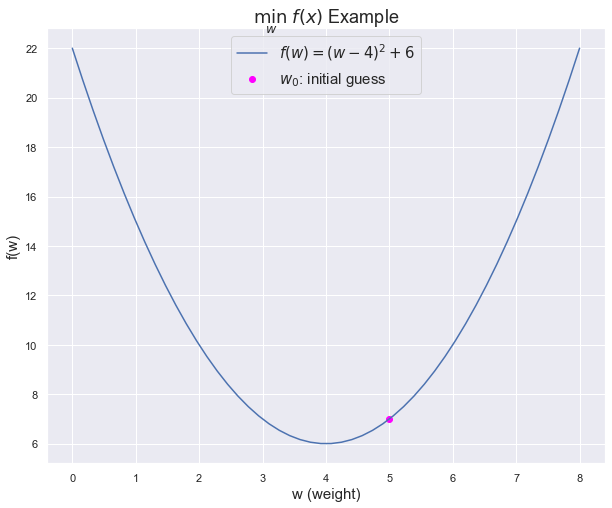

In [20]:
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 4)^2 + 6$")
plt.scatter([5], [f(5)], color = "magenta", label = "$w_0$: initial guess")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$ Example", fontsize = 18)
plt.show()

---


### - The General Idea 
The general idea behind gradient descent is to use the gradient (the derivative for single variable functions) to *provide a direction to explore* (this means gradient descent is a **first-order method**). For example, with our function $f$ and initial guess $w_0 = 5$, suppose we are able to calculate the value of the *gradient* (the derivative) of $f(w)$ at $w_0 = 5$. This numerical value will give us the *slope of the tangent line* to $f(w)$ at $w_0$. Note that $f'(w) = 2(w - 4)$.




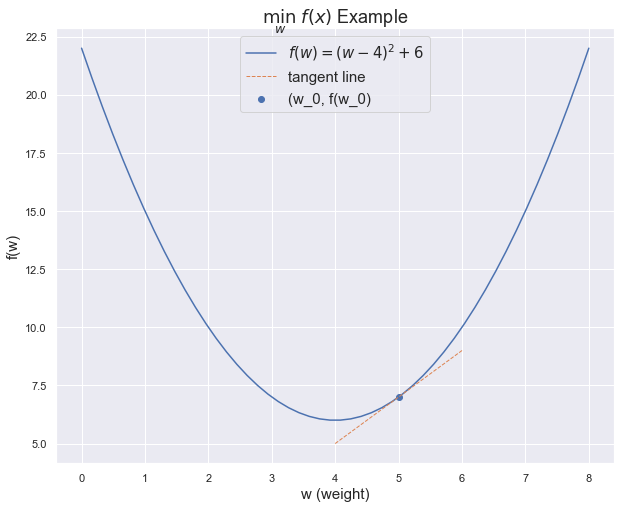

In [21]:
def df(w): 
    return 2*(w - 4)

w_0 = 5.0

def tangent_line(w_i, function, derivative, i = 0, show = True):
    def line(w):
        return derivative(w_i)*(w - w_i) + function(w_i)

    wrange = np.linspace(w_i - 1, w_i + 1, 10)
    if show:
        plt.plot(wrange,
            line(wrange), 
            'C1--', 
            linewidth = 1,  
            label = "tangent line")
    plt.scatter([w_i], [function(w_i)], label = f"(w_{i}, f(w_{i})")

# Plot the figure
plt.figure(figsize = (10, 8))
# Plot the function
plt.plot(domain, f(domain), label = "$f(w) = (w - 4)^2 + 6$")
tangent_line(w_0, f, df)

plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("$\min_w$ $f(x)$ Example", fontsize = 18)
plt.show()


##  Direction of Descent and the Learning Rate

Observing the figure generated by the code above, notice that the tangent line implies a direction of descent. That is, at the point $(5, f(5))$, the tangent line has a positive slope. This indicates that we need move in the negative direction (to the left of $w_0 = 5$) if we wish to move to a smaller value of $f(w)$. That is, **we need to move in the direction opposite of the sign of the derivative of $f(w)$ at $w_0 = 5$**.

### - But how far should we move? 
The value of how far to move in the opposite sign of the derivative of $f(w)$ at $w_0 = 5$ is called the **learning rate** (Nocedal & Wright call this *hyperparameter* the **step length**), and is typically denoted by $\alpha$. The process of multiplying the derivative of $f(w)$ at $w_0 = 5$ by the learning rate and forming a new choice of $w$ by subtracting this quantity from $w_0$ is called **gradient descent**. For example, we may apply gradient descent at $w_0$ and form a new $w$, say $w_1$, with the following update:

$$
w_{n+1} = w_n - \alpha f'(w_n) \:\:\:\:\:\:\:\:\:\: (\text{Gradient Descent Update Rule for a Function of one Variable})
$$

The choice of $\alpha$ in machine learning is typically found by experimentation, though more sophesticated techniques are available, such as *line-search* and *trust-region* methods (again see Nocedal & Wright). 

w_0 = 5.0
w_1 = 3.4


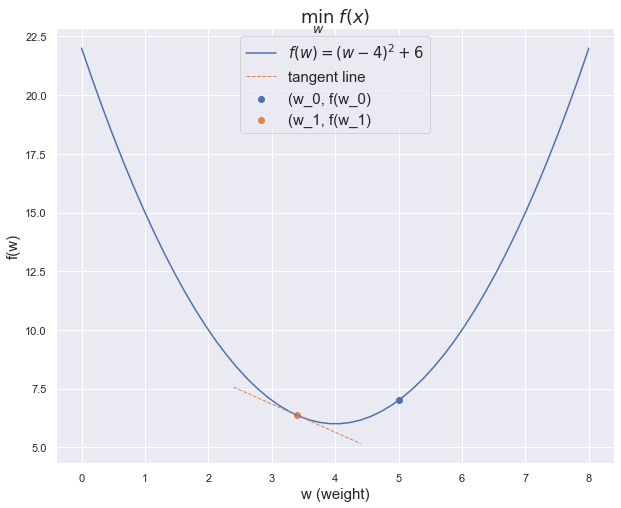

In [22]:
w_0 = 5.0

alpha = .8

w_1 = w_0 - alpha*df(w_0)

# Print the sequence of w variables
print(f"{w_0 = }")
print(f"{w_1 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 4)^2 + 6$")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1)

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()

w_0 = 5.0
w_1 = 3.4
w_2 = 4.36


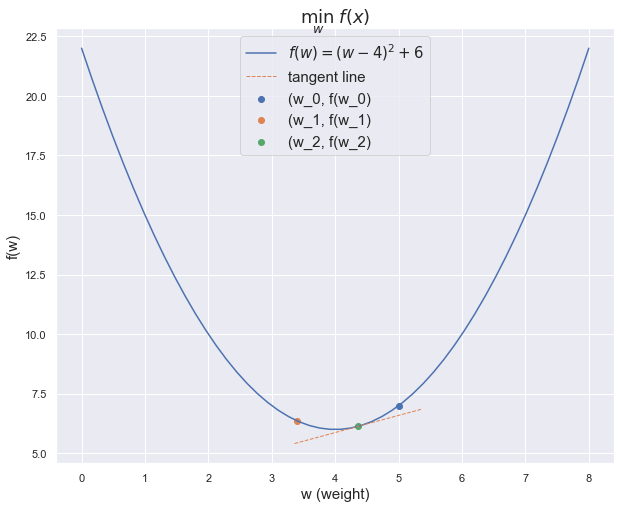

In [23]:
w_2 = w_1 - alpha*df(w_1)

print(f"{w_0 = }")
print(f"{w_1 = }")
print(f"{w_2 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 4)^2 + 6$")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, show = False)
tangent_line(w_2, f, df, i = 2)

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()

w_0 = 5.0
w_1 = 3.4
w_2 = 4.36
w_3 = 3.784


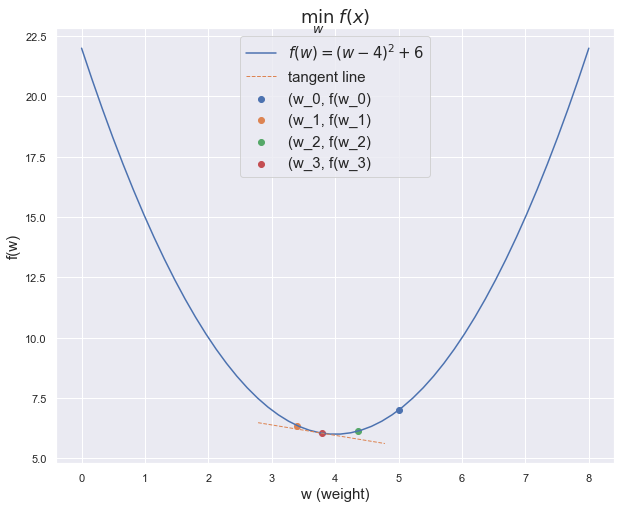

In [24]:
w_3 = w_2 - alpha*df(w_2)

print(f"{w_0 = }")
print(f"{w_1 = }")
print(f"{w_2 = }")
print(f"{w_3 = }")

plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 4)^2 + 6$")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, show = False)
tangent_line(w_2, f, df, i = 2, show = False)
tangent_line(w_3, f, df, i = 3)

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()

w_0 = 5.0 | df(w_0) = 2.0
w_1 = 3.4 | df(w_1) = -1.2000000000000002
w_2 = 4.36 | df(w_2) = 0.7200000000000006
w_3 = 3.78 | df(w_3) = -0.4320000000000004
w_4 = 4.13 | df(w_4) = 0.2591999999999999
w_5 = 3.92 | df(w_5) = -0.1555200000000001
w_6 = 4.05 | df(w_6) = 0.09331200000000095
w_7 = 3.97 | df(w_7) = -0.05598720000000057
w_8 = 4.02 | df(w_8) = 0.03359232000000034
w_9 = 3.99 | df(w_9) = -0.020155392000000383
w_10 = 4.01 | df(w_10) = 0.012093235200000052
w_11 = 4.0 | df(w_11) = -0.0072559411200003865
w_12 = 4.0 | df(w_12) = 0.004353564671999877
w_13 = 4.0 | df(w_13) = -0.0026121388032001036
w_14 = 4.0 | df(w_14) = 0.0015672832819202398
w_15 = 4.0 | df(w_15) = -0.0009403699691521439



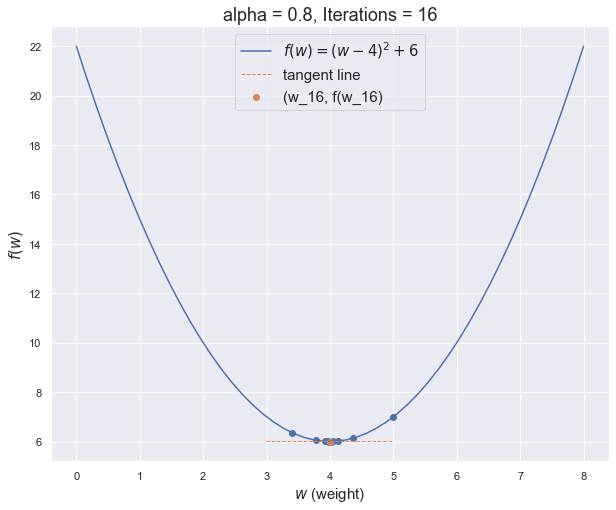

In [25]:
def derivative_descent(derivative, alpha = 0.8, w_0 = 5.0, max_iter = 1_000):
    W = [w_0]
    i = 0
    while abs(derivative(W[-1])) > 0.001 and i < max_iter:
        w_new = W[-1] - alpha*df(W[-1])
        W.append(w_new)
        i += 1
    W = np.array(W)

    return W

W = derivative_descent(df)

for i, w in enumerate(W):
    print(f"w_{i} = {np.round(w, decimals = 2)} | df(w_{i}) = {df(w)}")
print("")


plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 4)^2 + 6$")
plt.scatter(W, f(W))
tangent_line(W[-1], f, df, i = len(W))
plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$f(w)$", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)
plt.show()

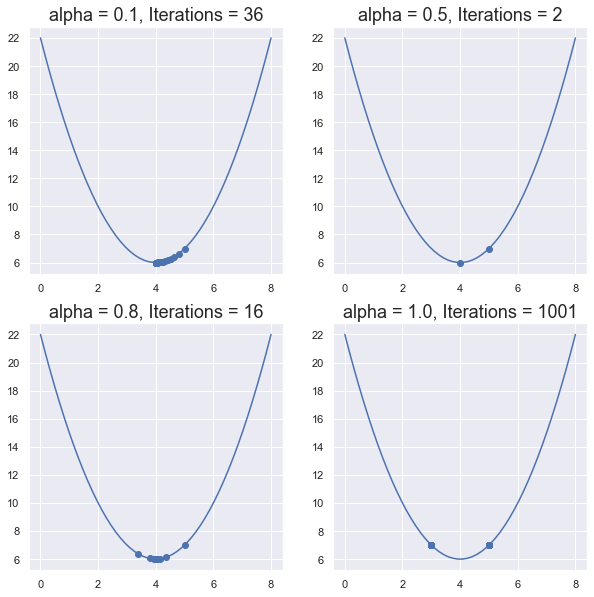

In [26]:
alphas = [0.1, 0.5, 0.8, 1.0]

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    W = derivative_descent(df, alpha = alpha)
    ax.plot(domain, f(domain))
    ax.scatter(W, f(W))
    ax.set_title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)

##  Minimizing Functions of Several Variables

All of the ideas above naturally generalize to functions of several variables when substituting the gradient for the single variable derivative. Before discussing this notion, we emphasize the general uncrontrained optimization problem:

$$
\min_{w\in \mathbb{R^n}} f(w) \:\:\:\:\:\:\:\:\:\: (\text{PROBLEM 2})
$$

For instructional purposes we next give a specific solution to this problem by focusing on a function of two variables, though all notions covered extend to functions of an arbitrary and finite number of variables. In a general manor, gradient descent can now be defined in a meaningful sense:

$$
w \leftarrow w - \alpha \nabla f(w) \:\:\:\:\:\:\:\:\:\: (\text{True Gradient Descent})
$$




With this multivariable gradient descent defined we now consider the multivariable function $f(w_0, w_1) = w_0^2 + w_1^2 + 1$ which has an obvious minimum at the vector $\mathbf{w} = [0.0, 0.0]^T$.

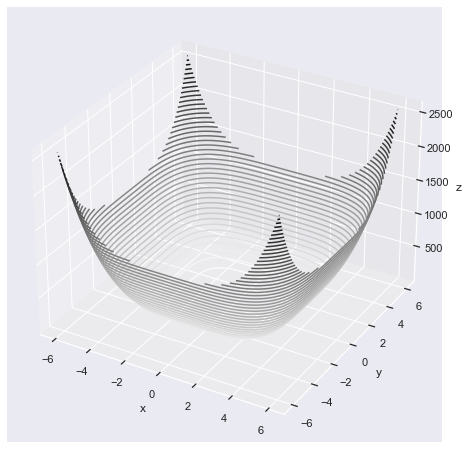

In [33]:
from mpl_toolkits import mplot3d

def f(w_0, w_1):
    return w_0 ** 4 + w_1 ** 4 + 6

x = np.linspace(-6, 6, 300)
y = np.linspace(-6, 6, 300)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

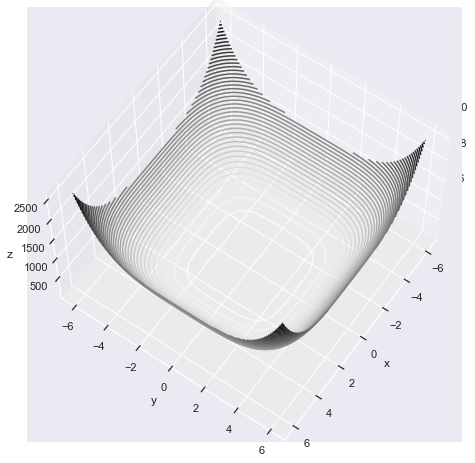

In [34]:
x = np.linspace(-6, 6, 300)
y = np.linspace(-6, 6, 300)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax.view_init(60, 35)
plt.show()


---

### - True Gradient Descent 
Now that we have a good visualization of our multivariable function we next define the derivative of our function and also update our gradient descent function to work with such functions. Next run the following code in the cell below.

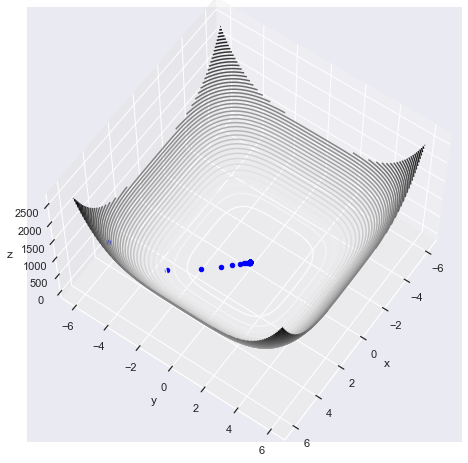

In [35]:
def df(w):
    grad = [4*w[0], 4*w[1]]
    return np.array(grad)

def gradient_descent(derivative, W, alpha = 0.8, max_iter = 1_000):
    i = 0
    W_hist = [W]
    while i < max_iter:
        W = W - alpha*df(W)
        i += 1
        W_hist.append(W)

    return W_hist

W = gradient_descent(df, np.array([5.0, -5.0]), alpha = 0.1, max_iter=500)

x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)


fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
for i in range(len(W)):
    ax.scatter3D([W[i][0]], 
                 [W[i][1]], 
                 [f(W[i][0], W[i][1])], color = "blue")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, 35)
plt.show()